In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import vega_datasets


In [101]:
from vega_datasets import data
data.sf_temps()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


### Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [102]:
df = data.sf_temps()
print(df.dtypes)

temp           float64
date    datetime64[ns]
dtype: object


In [103]:
df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [104]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:title={'center':'Average Daily Temp Over Time'}, xlabel='date'>

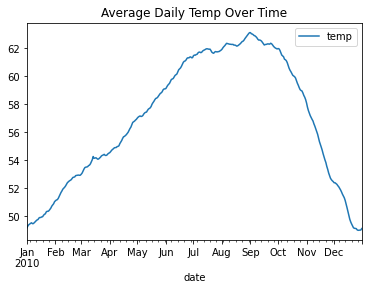

In [105]:
df.resample('D').mean().plot(title='Average Daily Temp Over Time')

In [106]:
by_day_df = df.resample('D').mean()

In [107]:
by_day_df.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


In [108]:
by_day_df.temp.min()

48.99166666666665

In [109]:
by_day_df.temp.max()

63.129166666666684

In [110]:
df.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [111]:
by_month_df = df.resample('M').mean()
by_month_df.head()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968


In [112]:
min_monthly_temp = by_month_df.temp.min()

In [113]:
by_month_df.loc[by_month_df.temp == min_monthly_temp]
#df.resample('D').mean().resample('M').mean().sort_values('temp').index[0]
#sort values function list smallest to biggest, and index[0] grabs the first row which is the smallest.  this works similarly to getting the minimum 

,temp
date,
2010-01-31,49.98414


In [114]:
max_monthly_temp = by_month_df.temp.max()

In [115]:
by_month_df.loc[by_month_df.temp == max_monthly_temp]

,temp
date,
2010-09-30,62.487083


### Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
### Use this resampled dataframe to calculate the change in temperature for the day. 
### Which month has the highest daily temperature variability?

In [116]:
minmax_by_day = df.resample('D').temp.agg(['min', 'max'])
minmax_by_day

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [117]:
#minmax_by_day['change'] = 
minmax_by_day.columns

Index(['min', 'max'], dtype='object')

In [118]:
minmax_by_day = minmax_by_day.rename(columns={'min':'min_temp', 'max':'max_temp'})

In [119]:
minmax_by_day['daily_change'] = minmax_by_day.max_temp - minmax_by_day.min_temp
minmax_by_day

,min_temp,max_temp,daily_change
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


<AxesSubplot:xlabel='date'>

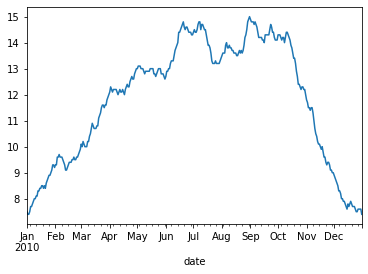

In [120]:
minmax_by_day['daily_change'].plot()

In [121]:
var_by_month = minmax_by_day.resample('M').mean()
max_change = var_by_month.daily_change.max()
var_by_month.loc[var_by_month.daily_change == max_change]

,min_temp,max_temp,daily_change
date,,,
2010-09-30,56.903333,71.306667,14.403333


In [122]:
#This code below is a workaround for renaming columns with a multi-index.

#daily_max = df.resample('D').max().rename(columns={'temp':'max'})
#daily_avg = df.resample('D').mean().rename(columns={'temp':'avg'})
#daily_min = df.resample('D').min().rename(columns={'temp':'min'})
#daily = daily_avg.join([daily_min, daily_max])

In [123]:
#daily_change = df.resample('D').agg(['min','max'])

#daily_change['change'] = daily_change[('temp', 'max')] - daily_change[('temp', 'min')]

#daily_change['change'].plot()

In [157]:
from vega_datasets import data
df = data.seattle_weather()

### Use the dataset to answer the following questions:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation?

In [158]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [159]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [160]:
df = df.set_index('date').sort_index()
df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [161]:
#df.head(30)
precip_by_year = df.precipitation.resample('Y').mean()

In [162]:
year_max_precip = precip_by_year.max()

In [163]:
year_max_precip

3.37753424657534

In [164]:
pd.DataFrame(precip_by_year)

,precipitation
date,
2012-12-31,3.349727
2013-12-31,2.268493
2014-12-31,3.377534
2015-12-31,3.121096


In [165]:
#creating a column for year and month respectively
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

AttributeError: 'DataFrame' object has no attribute 'date'

In [166]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [167]:
df.groupby(['year', 'month']).precipitation.sum().sort_values().tail()

KeyError: 'year'

KeyError: 'weather'

In [133]:
df.groupby(['year', 'month']).precipitation.sum().sort_values().max()

284.5000000000001

<AxesSubplot:xlabel='date'>

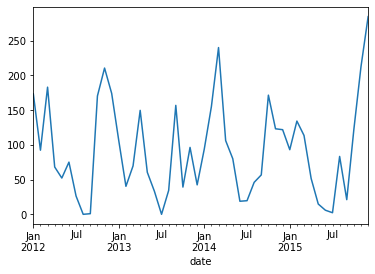

In [134]:
#visualize total precip by month
df.set_index('date').resample('M').precipitation.sum().plot()

<AxesSubplot:xlabel='date'>

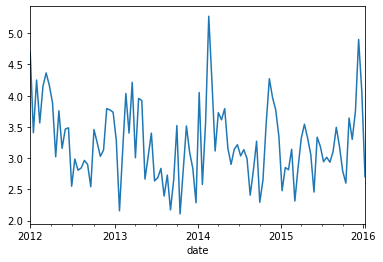

In [135]:
#visualize wind over time in a time interval you think is appropriate. (bi-weekly seemed to be close enought w/o going overboard)
df.set_index('date').wind.resample('2W').mean().plot()

In [136]:
df.groupby(['year', 'month']).wind.mean().sort_values().tail()

year  month
2012  2        3.903448
2014  11       3.983333
2012  3        4.248387
2015  12       4.341935
2014  2        4.528571
Name: wind, dtype: float64

In [137]:
df.groupby(['year', 'month']).wind.mean().sort_values().max()

4.5285714285714285

In [138]:
df[df.weather == 'sun'].groupby('year').size()
#sunniest year

year
2012    118
2013    205
2014    211
2015    180
dtype: int64

In [139]:
df.groupby('month').precipitation.sum().sort_values().tail(1)

month
11    642.5
Name: precipitation, dtype: float64

In [141]:
df['did_rain'] = df.precipitation > 0
df.groupby('month').did_rain.sum().sort_values().tail(1)

month
12    81
Name: did_rain, dtype: int64

## data.flights_20k()
1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?

In [147]:
df = vega_datasets.data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [148]:
df.delay = np.where(df.delay < 0, 0, df.delay)
#there are multiple ways to get the delay converted to 0.

In [149]:

df.groupby(df.date.dt.hour).delay.mean().sort_values().tail(3)

date
0    127.916667
1    170.000000
3    302.500000
Name: delay, dtype: float64

In [145]:
df.groupby(df.date.dt.day_name()).delay.mean().sort_values()

date
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

In [146]:
df.groupby(df.date.dt.month).delay.mean().sort_values()

date
3     9.875287
1    11.301592
2    12.306106
Name: delay, dtype: float64

In [150]:
## Groupby to get types of weather
df.set_index('date').groupby('weather').resample('Y').size()

KeyError: 'weather'